In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
 (x_train_all, y_train_all), (x_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_all.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train_all.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

we need to split our data into training and validation data

training -> used for training the model
validation -> used for fine-tune hyperparameters (like learning rate, number of layers)
testing -> will get used only once after training model tp finally check model accuracy

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size=0.1666, random_state=42)

# train -> 60,000
# validation -> 10,000
# test -> 10,000

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100, 157, 254, 254, 254, 254, 254, 254, 244, 118,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 118,  73,   0, 101,
        225, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 114,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 113, 247, 253, 249, 174, 251,
        253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 173,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 185, 253, 253, 253, 253, 253,
        253, 253, 226, 149, 149,  59,  39, 149, 149, 149, 208, 247,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 235, 253, 253, 253, 253, 253,
        253, 138,  19,   0,   0,   0,   0,   0,   0,   0,  15,  25,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 201, 253, 253, 253, 253, 223,
        122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  58, 247, 253, 253, 253, 240,
        149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  21, 102, 248, 253, 253, 253,
        239, 172,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 209, 253, 253,
        253, 253, 180,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 172, 243,
        253, 253, 253, 180,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        190, 253, 253, 253, 240,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         22, 175, 214, 253, 253, 114,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  54, 242, 253, 253, 214,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 102, 253, 253, 240,  61,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  76, 253, 253, 248,  79,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  21, 196, 253, 253, 214,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  74, 150,  26,   2,   8,  20,  20,
         61, 150, 230, 253, 253, 250, 130,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 118, 253, 253, 151, 186, 253, 253,
        253, 253, 253, 253, 250, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

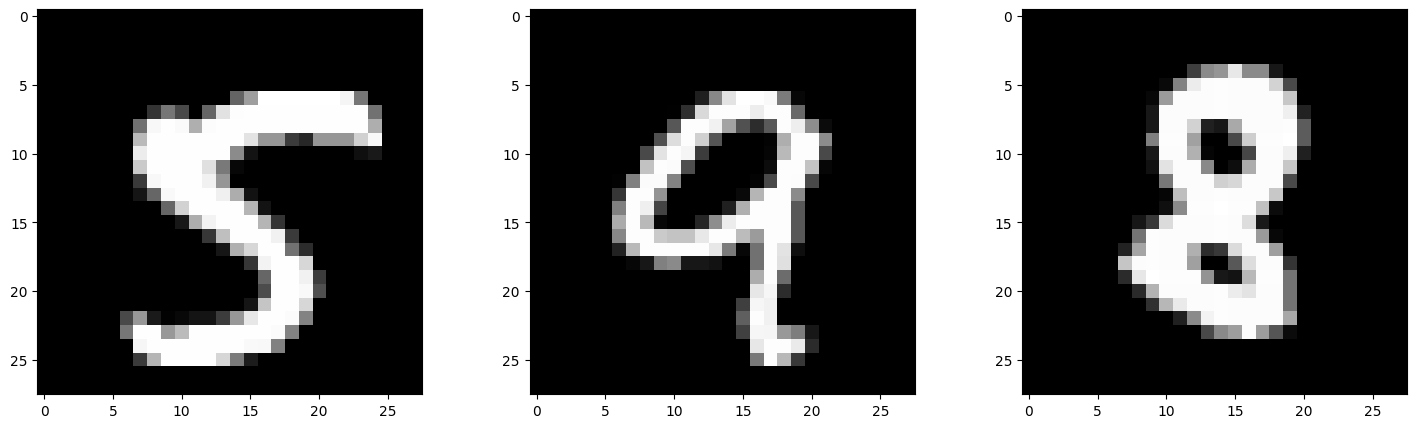

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(x_train[i], cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

Data Preprocessing

1. Convert 28 x 28 2D into (28,28,1) along with normalising to [0,1]

In [ ]:
x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train=x_train.astype("float32")/255

x_valid=x_valid.reshape((x_valid.shape[0], 28, 28, 1))
x_valid=x_valid.astype("float32")/255

x_test=x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test=x_test.astype("float32")/255

In [ ]:
x_train.shape

(50004, 28, 28, 1)

In [ ]:
y_train.shape

(50004,)

2. One-hot label Encoding
-> represent each label as a binary vector where the length of the vector is equal to the number of classes. All entries are set to zero except for the element that corresponds to the integer label.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)

y_valid = to_categorical(y_valid)
print(y_valid.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

(50004, 10)
(9996, 10)
(10000, 10)


CNN model

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation="relu",))
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation="relu"))

In [ ]:
model.add(Dense(units=10, activation="softmax"))

Model Training

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9003 - loss: 0.3178 - val_accuracy: 0.9806 - val_loss: 0.0586
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0472 - val_accuracy: 0.9858 - val_loss: 0.0459
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9881 - val_loss: 0.0408
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9893 - val_loss: 0.0389
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9905 - val_loss: 0.0351
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0130 - val_accuracy: 0.9914 - val_loss: 0.0352
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.9902 - val_loss: 0.0394
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9980 - loss: 0.0064 -

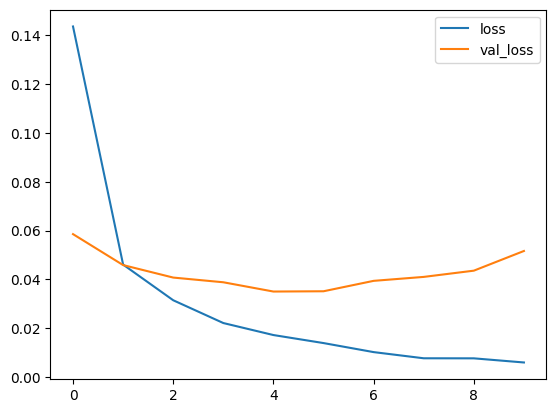

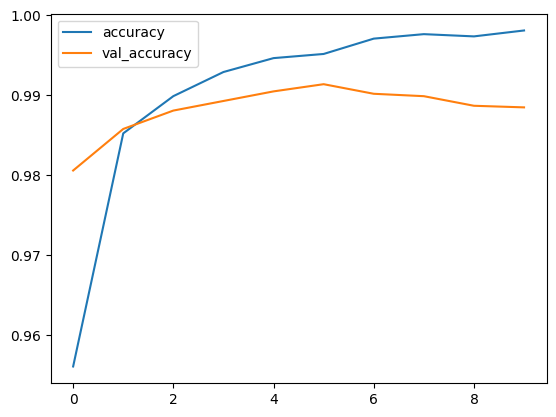

In [ ]:
#visualize training history
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 99.00%


Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


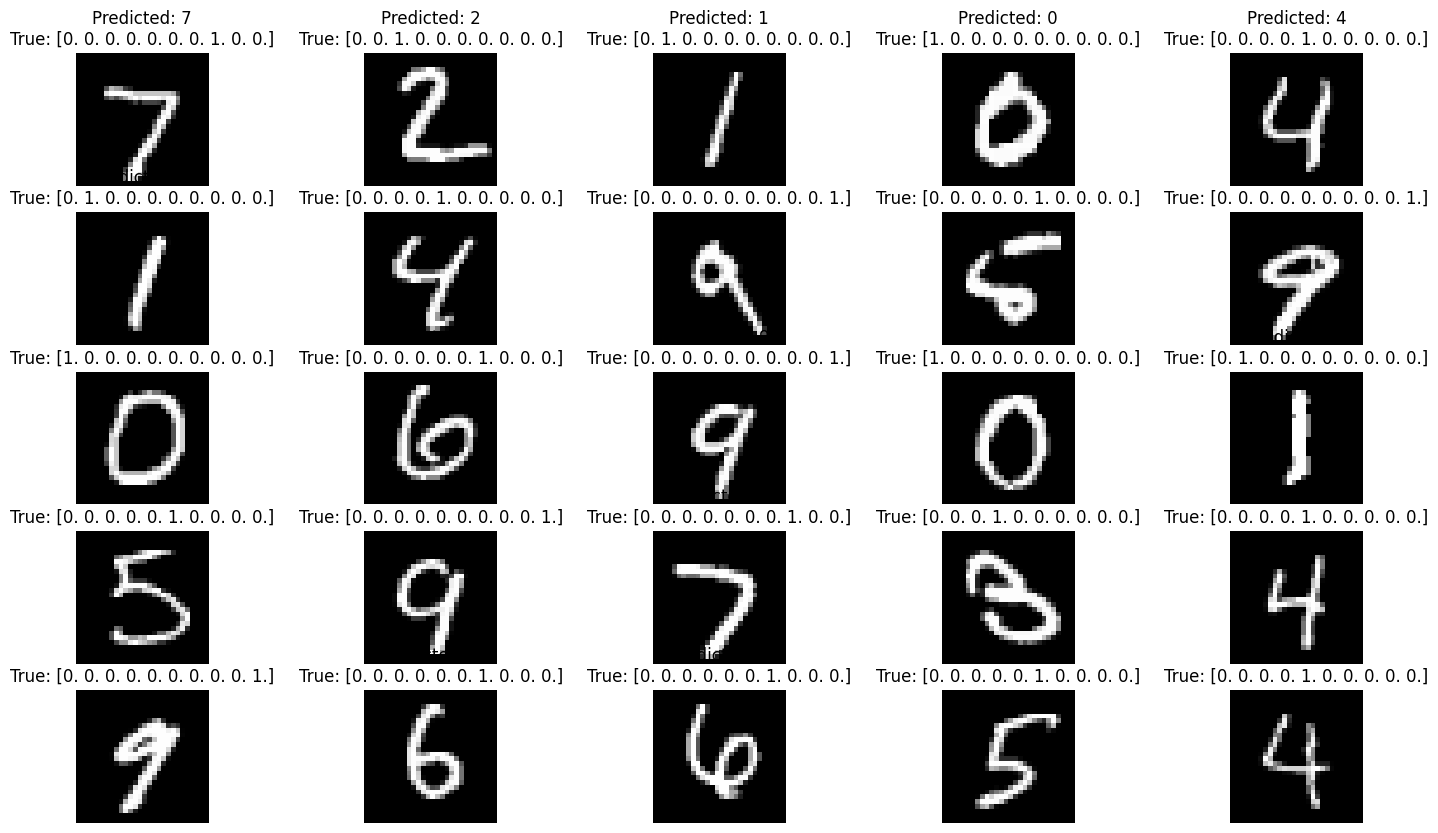

In [ ]:
# plotting test images with predicted vs. actual labels

pred=model.predict(x_test)
pred_labels=np.argmax(pred, axis=1)

plt.figure(figsize=(18, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
  plt.title(f"Predicted: {pred_labels[i]}\nTrue: {y_test[i]}")
  plt.axis("off")
plt.show()

In [ ]:
model.save("MNIST_cnn.h5")

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to Google Drive
model.save('/content/drive/MyDrive/model.h5')

Mounted at /content/drive
